# Tareas

<div class="alert alert-warning">
Fecha l√≠mite de entrega: domingoh 3 de Octubre, 2021 23:59
</div>

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets
import sympy
from mpl_toolkits import mplot3d

Populating the interactive namespace from numpy and matplotlib


<div class="alert alert-danger">
C√≥digo de regresi√≥n lineal de la clase:
</div>

In [22]:
#Codigo RL plagiado de clase :3

class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Par√°metros.
        ---------------
        alpha = Learning rate
        max_iters = N√∫mero m√°ximo de iteraciones
        tols = definici√≥n de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficaci√≥n
        
    def gradientDescent(self, x, y):
        """
        Par√°metros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        self.i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La funci√≥n convergi√≥ con beta: %s en la iteraci√≥n %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            self.i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

<div class="alert alert-danger">
Sea, por lo visto en clase:
$$
\hat{\textbf{y}} = \mathbf\beta_0 + \mathbf\beta_1 \textbf{x}
$$
Entoces, en el caso de 
    $\beta_0$ y $\beta_1$ (intersecci√≥n $I$ y pendiente $p$)
$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2n}\sum_{i=1}^{n}(y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$
Es decir, podemos describir
    $J(\beta_0,\beta_1)$
usando sympy como:
</div>  

In [3]:
beta,i,x,y,n = sympy.symbols('beta, i, x, y, n')
gradDes=(1/(2*n))*(sympy.Sum((sympy.Indexed(y,i)-sympy.Indexed(beta,0)-sympy.Indexed(beta,1)*sympy.Indexed(x,i))**2,(i,1,n)))
gradDes
#esto es a lo que pude llegar prof xd, las derivadas despues no me salieron y despues me dijeron c√≥mo pero no creo que sea
#honesto de mi parte copiar el proceso as√≠ que prefiero dejar esta as√≠. Los otros problemas si est√°n hechos y me impresiona
#que los pudiera contestar asi que preparese para ver el trabajo de un joven que no sab√≠a nada y ahora cree que lo sabe todo

Sum((-beta[0] - beta[1]*x[i] + y[i])**2, (i, 1, n))/(2*n)

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios ni√±os entre las edad de 2 y 8 a√±os. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresi√≥n lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gr√°fica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la √∫ltima iteraci√≥n.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al m√≠nimo en la gr√°fica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habr√° que agregar el entrenamiento del modelo a la funci√≥n que est√°s realizando para este _widget_)

<div class="alert alert-block alert-warning">
Decid√≠ dejar mi primer intento que cubre la respuesta a) y b). Abajo de ellos econtrar√° la respuesta realizada en clase junto con cuadros que expliquen los cambios y c√≥mo lo entend√≠ :)
</div>

<div class="alert alert-info">
(a) Primero recadamos los datos para hacer uso de la funci√≥n de Regresi√≥n Lineal utilizada en clase y utilizamos la ecuaci√≥n que se us√≥ en el primer ejercicio junto con el valor m=n=50, para generar la dimensi√≥n Z.
</div>

In [4]:
#Datos recaudados
ex = np.loadtxt('data/edad.dat')
ay = np.loadtxt('data/altura.dat')
NRL=RegresionLineal(alpha=0.03, max_iters=10000, tols=0.0000001)
NRL.gradientDescent(ex, ay)

La funci√≥n convergi√≥ con beta: [0.73300235 0.06700325] en la iteraci√≥n 1190


<div class="alert alert-info">
OK XD ... ehm, encontr√© en este link una forma mas f√°cil de hacerlo xd https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725 para plotearlo como una grafica de controno de superficie 3d. 
</div>

<div class="alert alert-danger">
Se utiliza meshgrid para formar un plano cartesiano dados dos arreglos unidimensionales y as√≠ poder crear una grafica de superficie sin huecos.
En este caso no necesitaremos crear un for en la funcion, dado que toma los valores x y y como referencia que son exactamente 50 c/u, por eso es bueno usar el meshgrid tambi√©n.
La funci√≥ sacar√° los valores Z=J(B0,B1) usando la ecuaci√≥n del Problema 1 para cada tupla (x,y) sacada del meshgrid:
$$\frac{1}{2n}(y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$
</div>

<div class="alert alert-info">
Notemos que, dado la l√≠nea de c√≥digo anterior: $\beta_0=0.73300235$ y $\beta_1=0.06700325$
Esto se sac√≥ gracias a la reresi√≥n lineal y se usar√°n en la funci√≥n tambi√©n
</div>

In [5]:
#Funci√≥n que regresar√° el valor de Z dados los x y los y, muy simple la ved√°h
def z_function(x, y):
    return (1/(2*50))*((y-0.73300235-(0.06700325*x))**2)
#Definimos cada x y y
x = ex
y = ay
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

Text(0.5, 0, 'J(B0,B1)')

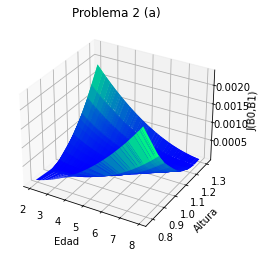

In [6]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_title('Problema 2 (a)');
ax.set_xlabel('Edad')
ax.set_ylabel('Altura')
ax.set_zlabel('J(B0,B1)')

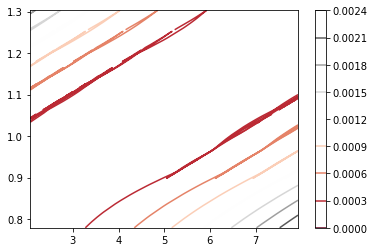

In [7]:
#De aqu√≠ sacamos la gr√°fica de contorno con los mismo datos
plt.contour(X, Y, Z, cmap='RdGy')
plt.colorbar();

<div class="alert alert-danger">
(b) Para poder hacer este, igual vamos a tener que sacar todos los valores de z y agruparlos en un mismo array. Para sacar Z=J(B0,B1) ocuparemos la funci√≥n del Problema 1:
$$\frac{1}{2n}\sum_{i=1}^{n}(y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$
que codearemos utilizando un for que vaya de 1-50 (0-49)
</div>  

In [8]:
#Generamos una lista z donde guardaremos los valores respectivos por cada i de 1-50 (en c√≥digo de 0-49)
z=[]
for i in range(50):
    v=(1/(2*50))*((ay[i]-0.73300235-(0.06700325*ex[i]))**2)
    z.append(v)
Z=np.array(z)
Z

array([8.50700050e-05, 5.89233862e-06, 4.81105060e-08, 5.43533941e-08,
       1.23833416e-05, 2.22103744e-05, 1.31578128e-05, 4.81356351e-06,
       5.55024538e-08, 2.60341111e-06, 3.31672898e-05, 2.24014294e-05,
       3.70404276e-06, 1.58905539e-07, 6.89244792e-05, 1.40863668e-05,
       3.77448193e-06, 7.56043420e-06, 5.22007113e-05, 1.63438867e-04,
       9.99536770e-07, 3.86258149e-06, 3.90941043e-05, 2.27416429e-05,
       2.66495422e-06, 3.27152441e-05, 1.45108395e-05, 2.20225194e-06,
       6.55520890e-06, 3.99153516e-05, 4.32218692e-06, 6.01678533e-09,
       1.24064833e-06, 2.57651982e-05, 6.15740627e-06, 1.66598659e-05,
       5.30195159e-06, 1.73990727e-05, 8.94929354e-06, 5.04027221e-06,
       4.59583030e-05, 6.39274854e-05, 3.61880044e-07, 1.60754916e-05,
       2.69975464e-06, 3.85409989e-05, 3.86267497e-05, 2.41838249e-05,
       7.36237802e-08, 6.64878753e-07])

<div class="alert alert-info">
El ultimo punto m√≠nimo generado en la gr√°fica de abajo es valor de  ùêâ(ùõΩ)  en la √∫ltima iteraci√≥n.
</div>

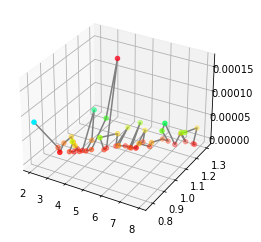

In [9]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = Z
x_line = ex
y_line = ay
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = Z
x_points = ex
y_points = ay
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

In [10]:
#Lo siento profe, intent√© los interact en 3d un buen y no sal√≠an :c

<div class="alert alert-block alert-warning">
Em√≠eza la dos de la clase
</div>

In [11]:
def J(beta0, beta1, x=ex, y=ay):
    n=len(y)
    costo=0
    for i in range(n):
        costo += 1/(2*n)*(y[i]-beta0-beta1*x[i])**2
    return costo

In [13]:
betas0=np.arange(-10,10,0.1)
betas1=np.arange(-10,10,0.1)
B0,B1=np.meshgrid(betas0,betas1)
C=J(B0,B1)

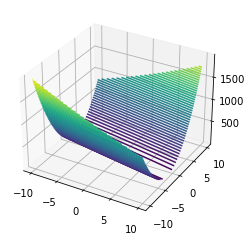

In [14]:
fig = plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(B0,B1,C,50)
plt.show()

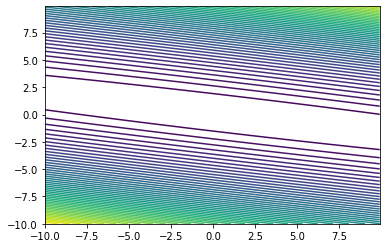

In [15]:
plt.contour(B0,B1,C,50)

In [18]:
r=RegresionLineal()
r.gradientDescent(ex,ay)

La funci√≥n convergi√≥ con beta: [0.57873101 0.095071  ] en la iteraci√≥n 455


<function matplotlib.pyplot.show(close=None, block=None)>

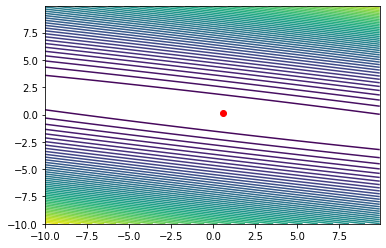

In [20]:
plt.contour(B0,B1,C,50)
plt.plot(r.beta[0],r.beta[1],'ro')
plt.show

In [21]:
from ipywidgets import interact_manual, FloatSlider

In [23]:
def step_size(alpha=0.03):
    r=RegresionLineal(alpha)
    r.gradientDescent(ex,ay)
    return r.beta, r.i

In [24]:
interact_manual(step_size, alpha=FloatSlider(value=0.01,min=0.0001,max=0.01,step=0.00001));

interactive(children=(FloatSlider(value=0.01, description='alpha', max=0.01, min=0.0001, step=1e-05), Button(d‚Ä¶

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [11]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (¬∫ F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresi√≥n lineal. Grafique los datos y el mejor modelo. Explique como lleg√≥ a los valores de $\alpha$. ¬øCoinciden con los mostrados en la p√°gina web?

<div class="alert alert-info">
(a) Le cambi√© el n√∫mero de iteraciones porque no me sal√≠a la convergencia, entonces pens√© ... a m√°s iteraciones, m√°s exactitud y jal√≥ xd. La alpha de igualmanera la cambie, dado que con la que ten√≠a, surgu√≠an errores a la hora de hacer la operaci√≥n con el gradiente, como divisiones entre cero,etc. 
</div>

In [12]:
data3=np.loadtxt('data/chirps.txt')
#generamos listas con los datos x e y y las convertimos en arreglos
csx=np.array([i[0] for i in data3])
cty=np.array([i[1] for i in data3])
#APLICAMOS LA FUNCI√ìN DE REGRESION LINEAL DE LA CLASE
CRL = RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
CRL.gradientDescent(csx, cty)

La funci√≥n convergi√≥ con beta: [22.26350136  3.44531603] en la iteraci√≥n 123659


<div class="alert alert-danger">
Utilic√© la funci√≥n pra plotear de la clase, solo cambiando los t√≠tulos. Tambien vemos en que iteracion se dio la convergencia y lo insertamos como par√°metro, al igual que la regresi√≥n lineal.
</div>

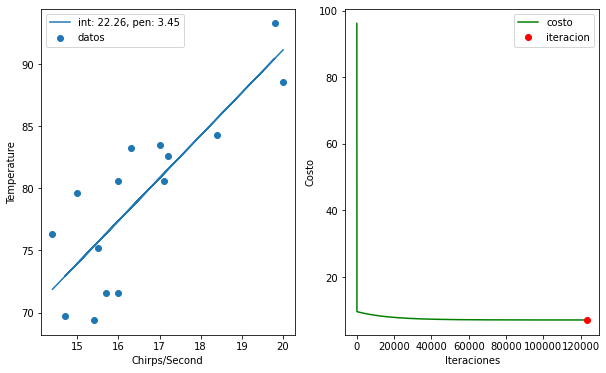

In [13]:
#Funci√≥n de ploteo de la clase :3
def plotModelo3(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # funci√≥n para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Chirps/Second')
    ax[0].set_ylabel('Temperature')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

plotModelo3(csx,cty, CRL, 123658)

<div class="alert alert-info">
Como se puede ver en la p√°gina web, la ecuaci√≥n de regresi√≥n lineal es:  
    $$ y=3.4x\ +\ 22.85$$
y yo obtve un resultado de
    $$ \beta_0=22.26350136,\ \beta_1=3.44531603 $$
Es decir, s√≠ coinciden los resultados al igual que la gr√°fica
    
</div>


**NOTA**: Datos obtenidos de [aqu√≠](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresi√≥n lineal ¬øQu√© sucede?

<div class="alert alert-danger">
Se copi√≥ y pego los datos de la tabla en un txt, el cual abrimos y creamos 4 arreglos distintos para guardar las respectivas x¬¥s y y¬¥s (primero en listas y despues se convirtieron en arreglos). Esto se va explicando en el c√≥digo.
</div>

In [14]:
#Creamos listas de listas vac√≠as (variables x y y de cada respectivo tipo de dato)
I=[[],[]]
II=[[],[]]
III=[[],[]]
IV=[[],[]]
txt = open("Cuarteto de Anscombe.txt", "r")
#Lectura del txt con los datos por l√≠nea y se agrupan
for l√≠nea in txt:
#Se separan los datos por el caracter '	' y se gaurdan en variables distintas (sabemos el orden de los datos por la tabla en 
# wikipedia)
    x1,y1,x2,y2,x3,y3,x4,y4=l√≠nea.split("	")
    x1=float(x1)
    x2=float(x2)
    x3=float(x3)
    x4=float(x4)
    y1=float(y1)
    y2=float(y2)
    y3=float(y3)
    y4=float(y4)
#Se agregan a su respectiva lista
    I[0].append(x1)
    I[1].append(y1)
    II[0].append(x2)
    II[1].append(y2)
    III[0].append(x3)
    III[1].append(y3)
    IV[0].append(x4)
    IV[1].append(y4)
txt.close()
#Conversi√≥n a array
I2=np.array(I)
II2=np.array(II)
III2=np.array(III)
IV2=np.array(IV)

<div class="alert alert-danger">
Al igual que arriba, utilic√© la funci√≥n de regresi√≥n lineal cambiando los parametros alpha y max_iters
</div>

In [15]:
CA_I = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
CA_I.gradientDescent(I2[0], I2[1])
CA_II = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
CA_II.gradientDescent(II2[0], II2[1])
CA_III = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
CA_III.gradientDescent(III2[0], III2[1])
CA_IV = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
CA_IV.gradientDescent(IV2[0], IV2[1])

La funci√≥n convergi√≥ con beta: [2.94731748 0.50531651] en la iteraci√≥n 12292
La funci√≥n convergi√≥ con beta: [2.9481381  0.50522536] en la iteraci√≥n 12293
La funci√≥n convergi√≥ con beta: [2.94967268 0.50495371] en la iteraci√≥n 12294
La funci√≥n convergi√≥ con beta: [2.94895873 0.50513421] en la iteraci√≥n 12294


<div class="alert alert-info">
¬°¬° ES IMPORTANTE NOTAR QUE LAS BETAS SON MUY SIMILARES !!
</div>

<div class="alert alert-danger">
Al igual que arriba se us√≥ la funcion de ploteo de la clase pero la modifiqupe para solo ploteara la graf√≠ca con la regresi√≥n lineal y asi poder mostrar las similitudes entre los CUARTETOS (las betas)
</div>

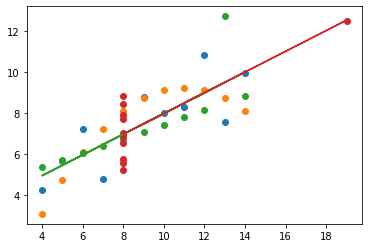

In [16]:
#Funci√≥n de ploteo de la clase :3
def plotModelo4(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # funci√≥n para graficar el modelo
    _beta = rl.historia['beta'][iteracion]
    plt.scatter(x,y, label="datos")
    plt.plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))

#ploteo de la funcion en la iteraci√≥n donde convergi√≥
plotModelo4(I2[0],I2[1], CA_I, 12291)
plotModelo4(II2[0],II2[1], CA_II, 12291)
plotModelo4(III2[0],III2[1], CA_III, 12291)
plotModelo4(IV2[0],IV2[1], CA_IV, 12291)

<div class="alert alert-danger">
COMO PODEMOS NOTAR, EN EFECTO LA REGRESI√ìN LINEAL EN CADA CASO ES IGUAL A LA DE LOS DEM√ÅS
</div>

## Problema 5

Use el archivo `radioactive_decay.dat`

In [3]:
%cat data/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¬øQu√© forma tienen?

<div class="alert alert-info">
Los datos tienen forma de funci√≥n EXPONENCIAL
</div>

Text(0, 0.5, 'N_(remaining)')

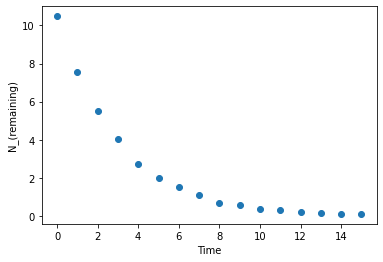

In [4]:
data5=np.loadtxt('data/radioactive_decay.txt')
#Abstraemos los N_remaining
rdY=np.array([i[1] for i in data5])
#Generamos el tiempo
rdX=np.array(range(16))
plt.scatter(rdX,rdY)
plt.xlabel('Time')
plt.ylabel('N_(remaining)')

**(b)** ¬øQu√© transformaci√≥n se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

<div class="alert alert-danger">
Aplicamos la funci√≥n inversa (logar√≠timica) para obtener una relaci√≥n lineal decreciente de los datos respecto al tiempo. Es decir, aplicamos log a cada valor y. No al tiempo porque xd ps eso ni al caso jaja. As√≠ obtenemos una linealizaci√≥n de los datos
</div>

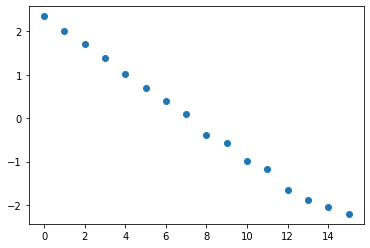

In [5]:
#Aplicamos la funci√≥n inversa
rdYL=np.array([np.log(i) for i in rdY])
lines=list(zip(rdX,rdYL))
#Generamos un nuevo txt con los datos
with open('transform_radioactive_decay.txt', 'w') as f:
    for line in lines:
        f.write(str(line[0]))
        f.write("	")
        f.write(str(line[1]))
        f.write('\n')

plt.scatter(rdX,rdYL)

**(c)** Aplique la regresi√≥n lineal a este conjunto de datos transformado, leyendo los datos del archivo reci√©n creado.

In [6]:
txt5 = open("transform_radioactive_decay.txt", "r")
a=[]
b=[]
#para cada linea del archivo txt la partimos en 2 valores distintos que estaban separados por "	" y los guardamos en listas
#distintas
for l√≠nea in txt5:
    x,y=l√≠nea.split("	")
    a.append(float(x))
    b.append(float(y))
txt5.close()
#conversi√≥n a array
X5=np.array(a)
Y5=np.array(b)
#aplicamos la funci√≥n de la clase
RD = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
RD.gradientDescent(X5, Y5)

La funci√≥n convergi√≥ con beta: [ 2.27548901 -0.31459673] en la iteraci√≥n 5755


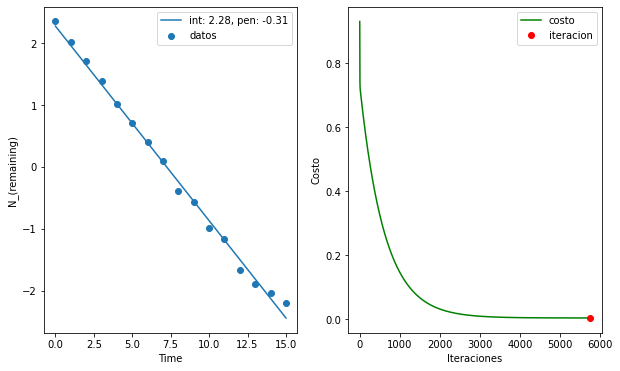

In [7]:
#Funci√≥n de ploteo de la clase :3
def plotModelo5(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # funci√≥n para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('N_(remaining)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

#ploteo de la funcion en la iteraci√≥n donde convergi√≥
plotModelo5(X5,Y5, RD, 5754)

**(d)** ¬øCu√°les son los valores de $\beta$ que mejor ajustan? ¬øCu√°les son el espacio sin transformar? Explique.

<div class="alert alert-info">
Sea seg√∫n la clase B0=intersecci√≥n y B1=pendiente, los valores B que mas ajustan es 
    $$ \beta_0=2.27548901\ ,\ \beta_1=-0.31459673 $$
</div>

In [8]:
RDT = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
RDT.gradientDescent(rdX,rdY)

La funci√≥n convergi√≥ con beta: [ 6.43577297 -0.54728535] en la iteraci√≥n 7016


<div class="alert alert-info">
El espacio sin transformar ser√≠a el siguiente, que vemos que se separa bastante de la regresi√≥n lineal con los datos transformados
</div>

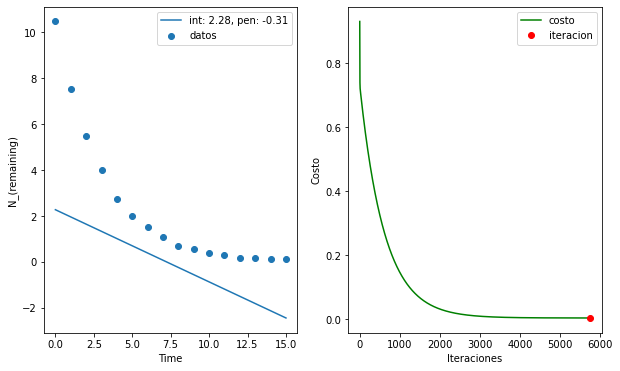

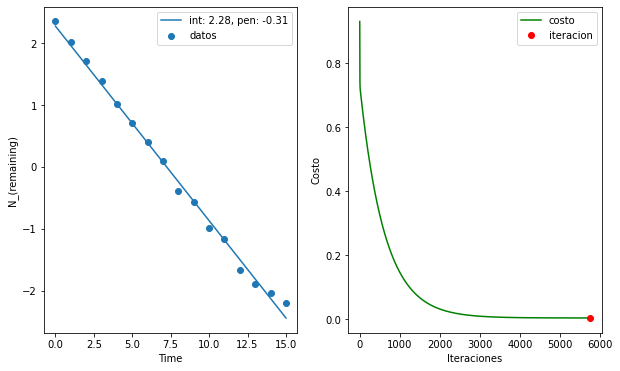

In [11]:
#Aplicamos los valores sin aplicar la linealizaci√≥n
plotModelo5(rdX,rdY, RD, 5754)
plotModelo5(X5,Y5, RD, 5754)